# dbcollection package usage tutorial

This tutorial shows how to use the `dbcollection` package to load and manage datasets in a simple and easy way. It is divided into two main topics: 
<ol>
<li>Dataset managing.</li>
<li>Fetch data from a dataset.</li>
</ol>

## dbcollection package information

Below a brief description of the package and its core APIs is presented so you as a user can immediately start using this package after this tutorial.

### Overview 
This package contains a collection of datasets with pre-defined methods for data download (when available/possible)
and processing. A dataset's information is stored into a HDF5 file where the necessary metadata is stored into several groups that (usually) correspond to train, val and/or sets. In turn, the information of which dataset's have been defined in the system is stored in a `.json` cache file in a directory your home directory: `dbcollection/db_cache_info.json`.

### Data access
To access this file, a special API is available for easy access to data through a few commands. Also, the user can directly access the metadata file if desired. The metadata file contains all information available for each dataset like image file names, class labels, bounding boxes, etc. The metadata is stored into two ways: 1) the original metadata format style is kept and stored under the group '**set**/source/'; and 2) all fields are stored separately into single arrays for fast access and combined by a field named 'object_id' which contains all the indexes relating each field with each other, and all fields are stored under the group '**set**/default/'.

### Features

The benefits of using this framework allows the following:
- A dataset can be setup once and reused as many times as needed
- Since data is stored and accessed from disk, the memory footprint is small for any dataset
- It has cross-platform (Windows, Linux, MacOS) and cross-language (C/C++, Python, Lua, Matlab) capabilities
- Any dataset can be setup/stored using this framework (images, text, etc.)


### Dataset managing API

For loading/removing/setup datasets, the `dbcollection` package contains module `manager` which has the following methods:
- **dbcollection.manager.load(name, task, verbose):** Returns a metadata loader of a dataset.
- **dbcollection.manager.setup(name, data_dir, task_name, is_download, verbose):** Setup a dataset's metadata and cache files on disk.
- **dbcollection.manager.remove(name, delete_data):** Delete a dataset from the cache.
- **dbcollection.manager.manage_cache(field, value, delete_cache, clear_cache, verbose):** Manages the cache file.
- **dbcollection.manager.query(pattern):** Do simple queries to the cache.
- **dbcollection.manager.info(verbose):** Prints the cache file contents.


### Data loading API

When loading a dataset, `dbcollection.manager.load()` returns a `class DatasetLoader` which contains some information about the dataset like `name`, `task`, `data_dir`, `cache_path` and, for each set of the dataset (train/val/test/etc), a `ManagerHDF5` class which contains the data fetching methods for the HDF5 metadata file is assigned.

The data loader API contains the following methods for data retrieval:
- **get(field_name, idx):** Retrieve the i'th data from the field 'field_name'.
- **object(idx, is_value):** Retrieves the data's ids or contents of all fields of an object.
- **size(field_name):** Returns the number of the elements of a 'field_name'.
- **list():** Lists all fields.
- **object_field_id(field_name):** Retrieves the index position of a field in the object id list.


### Note

This package uses a cache file to store all the information about the dataset's data directory, name, available tasks, etc. This file won't be available until you use the dataset managing API methods for the first time.


# Tutorial 1: Setup a dataset 

This tutorial shows how you can easily setup and load a dataset from the available list with a few simple commands.

Here, we will download the MNIST dataset, setup its metadata file with the train+test sets and display the Loader contents for this dataset.

In [1]:
# import tutorial packages
from __future__ import print_function
import os
import sys
import numpy as np
import dbcollection.manager as dbclt

### Step 1: Display the cache file contents to the screen 

First, lets check if the MNIST dataset exists on cache. 

NOTE: if this is the first time using the package, a folder `dbcollection/` will be created in your home directory along with the `db_cache_info.json` cache file inside which contains all of the dataset's information.

In [2]:
# display cache files contents
dbclt.info()

Printing contents of /home/mf/dbcollection/db_cache_info.json:

*** Paths info ***
{
    "default_cache_dir": "/home/mf/dbcollection",
    "default_data_dir": "/home/mf/db_data"
}

*** Dataset info ***
{
    "mnist": {
        "data_dir": "/home/mf/tmp/data/mnist",
        "keywords": [
            "classification"
        ],
        "tasks": {
            "classification": "/home/mf/dbcollection/mnist/classification.h5",
            "default": "/home/mf/dbcollection/mnist/classification.h5"
        }
    }
}

*** Dataset categories ***
{
    "classification": [
        "mnist",
        "cifar10"
    ],
    "image_processing": [
        "cifar10"
    ]
}



In [3]:
# display available datasets for download/process in the package
dbclt.info(list_datasets=True)

dbcollection available datasets:  ['mnist', 'ilsvrc2012', 'pascal_voc_2007', 'cifar10', 'cifar100']


In [4]:
# lets make a directory to store the data
path = os.path.join(os.path.expanduser("~"), 'tmp', 'data')
if not os.path.exists(path):
    os.makedirs(path)

# download + setup the MNIST dataset
dbclt.setup(name='mnist', data_dir=path)

==> (3/3/) Skip post processing.


In [5]:
# display cache files contents (mnist should be listed now)
dbclt.info()

Printing contents of /home/mf/dbcollection/db_cache_info.json:

*** Paths info ***
{
    "default_cache_dir": "/home/mf/dbcollection",
    "default_data_dir": "/home/mf/db_data"
}

*** Dataset info ***
{
    "mnist": {
        "data_dir": "/home/mf/tmp/data/mnist",
        "keywords": [
            "classification"
        ],
        "tasks": {
            "classification": "/home/mf/dbcollection/mnist/classification.h5",
            "default": "/home/mf/dbcollection/mnist/classification.h5"
        }
    }
}

*** Dataset categories ***
{
    "classification": [
        "mnist",
        "cifar10"
    ],
    "image_processing": [
        "cifar10"
    ]
}



In [6]:
# load the MNIST dataset
loader = dbclt.load(name='mnist')

# print the dataset's information
print('######### info #########')
print('')
print('Dataset: ' + loader.name)
print('Task: ' + loader.task)
print('Data path: ' + loader.data_dir)
print('Metadata cache path: ' + loader.cache_path)
print('Sets: ', loader.sets)

######### info #########

Dataset: mnist
Task: default
Data path: /home/mf/tmp/data/mnist
Metadata cache path: /home/mf/dbcollection/mnist/classification.h5
Sets:  ['train', 'test']


### Step 2: Remove a dataset

Removing datasets from the list is very simple by calling the **remove()** method.

Lets install another dataset, show that it was successfully installed and then remove it. 

In [7]:
# download + setup the CIFAR10 dataset
dbclt.setup(name='cifar10', data_dir=path) # store the dataset's files to ~/data/

==> (1/3) Download/setup cifar10 data to disk...
(1/1) Download url: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

Extracting file to disk: /home/mf/tmp/data/cifar10
==> (1/3) Download/setup complete.
==> (2/3) Processing cifar10 metadata files...
==> (2/3) Processing complete.
==> (3/3/) Skip post processing.


In [8]:
# display cache files contents (cifar10 should be listed now)
dbclt.info()

Printing contents of /home/mf/dbcollection/db_cache_info.json:

*** Paths info ***
{
    "default_cache_dir": "/home/mf/dbcollection",
    "default_data_dir": "/home/mf/db_data"
}

*** Dataset info ***
{
    "cifar10": {
        "data_dir": "/home/mf/tmp/data/cifar10",
        "keywords": [
            "image_processing",
            "classification"
        ],
        "tasks": {
            "classification": "/home/mf/dbcollection/cifar10/classification.h5",
            "default": "/home/mf/dbcollection/cifar10/classification.h5"
        }
    },
    "mnist": {
        "data_dir": "/home/mf/tmp/data/mnist",
        "keywords": [
            "classification"
        ],
        "tasks": {
            "classification": "/home/mf/dbcollection/mnist/classification.h5",
            "default": "/home/mf/dbcollection/mnist/classification.h5"
        }
    }
}

*** Dataset categories ***
{
    "classification": [
        "mnist",
        "cifar10"
    ],
    "image_processing": [
        "cifa

In [9]:
# load the cifar10 dataset
loader = dbclt.load(name='cifar10')

# print the dataset's information
print('######### info #########')
print('')
print('Dataset: ' + loader.name)
print('Task: ' + loader.task)
print('Data path: ' + loader.data_dir)
print('Metadata cache path: ' + loader.cache_path)
print('Sets: ', loader.sets)

######### info #########

Dataset: cifar10
Task: default
Data path: /home/mf/tmp/data/cifar10
Metadata cache path: /home/mf/dbcollection/cifar10/classification.h5
Sets:  ['train', 'test']


In [10]:
# remove the dataset from the cache and delete its files from disk
dbclt.remove(name='cifar10', delete_data=True)

Removed dataset cifar10: cache=True, disk=True


In [11]:
# display cache files contents (cifar10 shouldn't be listed)
dbclt.info()

Printing contents of /home/mf/dbcollection/db_cache_info.json:

*** Paths info ***
{
    "default_cache_dir": "/home/mf/dbcollection",
    "default_data_dir": "/home/mf/db_data"
}

*** Dataset info ***
{
    "mnist": {
        "data_dir": "/home/mf/tmp/data/mnist",
        "keywords": [
            "classification"
        ],
        "tasks": {
            "classification": "/home/mf/dbcollection/mnist/classification.h5",
            "default": "/home/mf/dbcollection/mnist/classification.h5"
        }
    }
}

*** Dataset categories ***
{
    "classification": [
        "mnist",
        "cifar10"
    ],
    "image_processing": [
        "cifar10"
    ]
}



In [12]:
# to show that the dataset it was removed, lets attempt to load cifar10 again (should give an error)
loader = dbclt.load(name='cifar10')

Exception: Dataset/task not available for load.

### Step 3: Change some information of the cache file

In cases where you need to change some information regarding the cache file, you can use the **manage_cache()** method for this. **Note:** This can also be done by modifying the `.json` file directly. 

Here we'll rename the path of the MNIST data directory to another name and we'll update the cache file information with the new path. Later we'll see the effects of this change when loading data samples from disk.

In [ ]:
# fetch MNIST data folder path. For this, we'll use the query() method to retrieve 
# the information about the mnist dataset as a list
result = dbclt.query('mnist')

print('Result query: ', result)

if 'data_dir' in result['mnist']:
    data = result['mnist']
    data_dir = result['mnist']['data_dir']

print('\nMNIST data directory: {}'.format(data_dir))

# rename the directory
data_dir_new = data_dir + 'new'
os.rename(data_dir, data_dir_new)
print('\nRenamed mnist folder to: {}'.format(data_dir_new))

In [ ]:
# update the path of the data dir in the cache file
new_data = data
new_data['data_dir'] = data_dir_new
dbclt.manage_cache(field='mnist', value=new_data)

print('New data: ', new_data)

In [ ]:
# check if the data directory path was modified
dbclt.info()

# Tutorial 2: Fetch data from a dataset.

This tutorial shows how to fetch data from a dataset using an API.

The **load()** method returns a `DatasetLoader` class which contains information about the dataset like the name, task, data paths, sets and a handler for the metadata (HDF5) file for direct access. Also, for each set, a `ManagerHDF5` class is setup so you can easily access data with a simple API to retrieve data from the metadata file.

In this tutorial we will use the `MNIST` dataset to retrieve and display data by using the API to fetch data and by directly accessing the data by using the HDF5 file handler.

In [9]:
# NOTE: in order to store strings in the HDF5 file, they are converted to ascii format 
# and then stored as a numpy array of type 'numpy.uint8'. So, when retrieving string 
# fields, we must convert them from ascii back to str. This package contains some utility
# functions for this task.
from dbcollection.utils import convert_ascii_to_str as _tostr
import matplotlib.pyplot as plt

### Step 1: Load the MNIST dataset

Load the `MNIST` dataset using the `default` task.

<blockquote>
<p>NOTE: many datasets like [MSCOCO](http://mscoco.org) have multiple tasks like **object detection**, **caption** or **human body joint keypoint detection**. In order to cope with this, we store each task into a separate HDF5 file by name. Then, when loading a dataset, one just needs to specify which dataset and task to load.</p>
</blockquote>

In [4]:
# load mnist
mnist_loader = dbclt.load(name='mnist', task='default')

### Step 2: List all data fields composing the MNIST metadata

Usually, different datasets have different attributes/data fields/annotations. The **list()** method returns all data fields of a dataset.

Here we'll use the `train` set to fetch this information, but you could retrieve this information from the `test` set as well. For the rest of the steps we'll continue to use the `train` set as the source of data.

In [5]:
# fetch data fields
fields = mnist_loader.train.list()

print('MNIST fields:')
print(fields)

MNIST fields:
['classes', 'data', 'labels', 'object_ids', 'object_fields']


### Step 3: Fetch all class labels and print them

Fetch the class names/labels of the mnist dataset using the **get()** method.

In [6]:
# fetch class labels
labels = mnist_loader.train.get('classes')

print('MNIST class labels:')
print(_tostr(labels))

MNIST class labels:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


### Step 4: Show data size

To get the size of any field you need to use the **size()** method. 

In [7]:
# show size of the images data
print('Total images:', mnist_loader.train.size('data'))
print('Image data size:', mnist_loader.train.size('data', True)) # return the shape of the array
print('')

# show the size of the labels
print('Total labels:', mnist_loader.train.size('labels'))
print('Label size:', mnist_loader.train.size('labels', True)) # return the shape of the array
print('')

# show the size of the object_id list
print('Total objects:', mnist_loader.train.size('labels'))
print('Objects size:', mnist_loader.train.size('labels', True)) # return the shape of the array

Total images: 60000
Image data size: [60000, 1, 28, 28]

Total labels: 60000
Label size: [60000]

Total objects: 60000
Objects size: [60000]


### Step 5: Fetch an image + label

The image's data + label are grouped together in a field named `object_id` (this is true for any dataset). This is usefull in some cases and not in others. In the `MNIST` case, having only the image data and labels information would suffice, but in other cases it would be impossible to keep track of what matches with.

For example, in object detection tasks likes MSCOCO or the Pascal VOC, images usually contain several objects and each has its own class label. The easiest way to store such relationships between images and objects is to use a list of indexes of each data field like filename, label, bounding box, etc.

Here, the `object_id` field contains the indexes of both images and labels. To fetch this information, you have two choices:
<ol>
<li>Use **get('object_id', idx)**</li>
<li>Use **object(idx)** to fetch a list of indexes.</li>
</ol>

Although both returns the same output, the **object()** can return either a list of indexes or a list of values, i.e., it automatically fetch the data of all fields w.r.t their indexes.

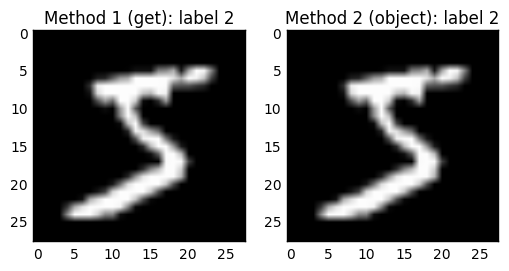

In [23]:
# fetch the first image + label
# fetch data using get()
list_idx = mnist_loader.train.get('object_ids', 0)
img = mnist_loader.train.get('data', list_idx[0])
label = mnist_loader.train.get('labels', list_idx[1])

# fetch the same data using object()
img2, label2 = mnist_loader.train.object(0, True) #True - return values | False - return indexes

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].set_title('Method 1 (get): label {}'.format(label))
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title('Method 2 (object): label {}'.format(label2))
axs[1].imshow(img2 cmap=plt.cm.gray)
plt.show()

### Step 6: Fetch random images and display them

This example loads images randomly and displays them in a 8x8 grid.

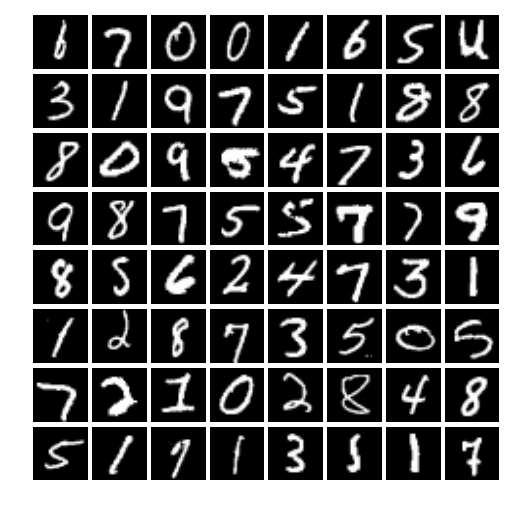

In [57]:
import random
from mpl_toolkits.axes_grid1 import ImageGrid

# get data size
img_size = mnist_loader.train.size('data')

fig = plt.figure(1, (6., 6.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(8, 8),  # creates 8*8 grid of axes
                 axes_pad=0.05,  # pad between axes in inch.
                 )

for i in range(8*8):
    img, label = mnist_loader.train.object(random.randint(1, img_size), True)
    grid[i].axis('off')
    grid[i].imshow(img, cmap=plt.cm.gray)

plt.show()

### Step 7: Access data through python's HDF5 file API 

You can directly access the metadata's data file from the data loader. This allows the user to access the data in two formats:
<ol>
<li>`default` format, where each data field is stored as a single and separate numpy array and where the fields are combined by the `object_id` field.</li>
<li>`source` format, where the data is stored in the dataset's original format (usually in a nested scheme).</li>
</ol>

These two formats are translated to two distinct groups in the HDF5 file for each set (train/val/test/etc). They are defined by `default/` (API friendly) and `source/` (original data format). Since some users might prefer one approach over the other, by given both choices it should provide the most adequate option for most users and/or situations.

In the following example, data is retrieved by directly using the python's HDF5 API.

Display image nº4616
Label: 9


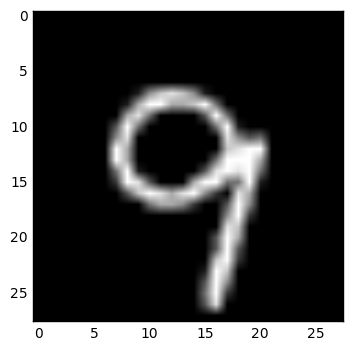

In [43]:
# get the HDF5 file handler
mnist_h5 = mnist_loader.file.storage

# fetch a random image and label from the test set
size = len(mnist_h5['test/source/labels'])
idx = random.randint(1, size)
img = mnist_h5['test/source/data'][idx]
label = mnist_h5['test/source/labels'][idx]

print('Display image nº{}'.format(idx))
print('Label: {}'.format(label))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()